In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('icc.csv', encoding='iso-8859-1')
df.head(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Player_URL
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,http://stats.espncricinfo.com/ci/content/playe...
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,http://stats.espncricinfo.com/ci/content/playe...
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,http://stats.espncricinfo.com/ci/content/playe...
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,http://stats.espncricinfo.com/ci/content/playe...
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,http://stats.espncricinfo.com/ci/content/playe...
5,V Kohli (INDIA),2008-2020,245,236,39,11792,183,59.85,12626,93.39,43,57,13,http://stats.espncricinfo.com/ci/content/playe...
6,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,http://stats.espncricinfo.com/ci/content/playe...
7,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,http://stats.espncricinfo.com/ci/content/playe...
8,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.7,22,72,16,http://stats.espncricinfo.com/ci/content/playe...
9,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,http://stats.espncricinfo.com/ci/content/playe...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589 entries, 0 to 2588
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      2589 non-null   object
 1   Span        2589 non-null   object
 2   Mat         2589 non-null   int64 
 3   Inns        2589 non-null   object
 4   NO          2589 non-null   object
 5   Runs        2589 non-null   object
 6   HS          2589 non-null   object
 7   Ave         2589 non-null   object
 8   BF          2589 non-null   object
 9   SR          2589 non-null   object
 10  100         2589 non-null   object
 11  50          2589 non-null   object
 12  0           2589 non-null   object
 13  Player_URL  2589 non-null   object
dtypes: int64(1), object(13)
memory usage: 283.3+ KB


In [4]:
missing=df.isna().sum()
print('Missing values:', missing)

Missing values: Player        0
Span          0
Mat           0
Inns          0
NO            0
Runs          0
HS            0
Ave           0
BF            0
SR            0
100           0
50            0
0             0
Player_URL    0
dtype: int64


In [5]:
# we can see from df.info() that most of the columns are object dataytpe, basically multiple data types, in this case we need too
#drop the URL column, and convert them, also no missing values as of yet

In [6]:
numerical_columns = ['Mat', 'Inns', 'NO', 'Runs', 'HS','BF', '100', '50', '0']

for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df['Ave'] = df['Ave'].replace('-', np.nan)
df['SR'] = df['SR'].replace('-', np.nan)

float_columns = ['Ave', 'SR']
for column in float_columns:
    df[column] = df[column].astype(float)



print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589 entries, 0 to 2588
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      2589 non-null   object 
 1   Span        2589 non-null   object 
 2   Mat         2589 non-null   int64  
 3   Inns        2496 non-null   float64
 4   NO          2496 non-null   float64
 5   Runs        2496 non-null   float64
 6   HS          1707 non-null   float64
 7   Ave         2376 non-null   float64
 8   BF          2496 non-null   float64
 9   SR          2487 non-null   float64
 10  100         2496 non-null   float64
 11  50          2496 non-null   float64
 12  0           2496 non-null   float64
 13  Player_URL  2589 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 283.3+ KB
None


In [7]:
df.replace('', np.nan, inplace=True)

total_outs = df['Inns'] - df['NO']

total_sr = (df['Runs'] / df['BF']) * 100

df['Ave'] = df['Ave'].fillna(df['Runs'] / total_outs)
df['SR'] = df['SR'].fillna(total_sr)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589 entries, 0 to 2588
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      2589 non-null   object 
 1   Span        2589 non-null   object 
 2   Mat         2589 non-null   int64  
 3   Inns        2496 non-null   float64
 4   NO          2496 non-null   float64
 5   Runs        2496 non-null   float64
 6   HS          1707 non-null   float64
 7   Ave         2479 non-null   float64
 8   BF          2496 non-null   float64
 9   SR          2488 non-null   float64
 10  100         2496 non-null   float64
 11  50          2496 non-null   float64
 12  0           2496 non-null   float64
 13  Player_URL  2589 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 283.3+ KB


In [8]:
df.tail(94)
#we can see that last 93 rows are of no use to us

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Player_URL
2495,Zakir Hossain (BDESH),1998-1998,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,http://stats.espncricinfo.com/ci/content/playe...
2496,Aamer Hameed (PAK),1977-1978,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://stats.espncricinfo.com/ci/content/playe...
2497,Abdur Rauf (PAK),2008-2008,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://stats.espncricinfo.com/ci/content/playe...
2498,Abu Jayed (BDESH),2019-2019,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://stats.espncricinfo.com/ci/content/playe...
2499,FS Ahangama (SL),1985-1985,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://stats.espncricinfo.com/ci/content/playe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2584,Washington Sundar (INDIA),2017-2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://stats.espncricinfo.com/ci/content/playe...
2585,M Watkinson (ENG),1996-1996,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://stats.espncricinfo.com/ci/content/playe...
2586,S Weerakoon (SL),2012-2012,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://stats.espncricinfo.com/ci/content/playe...
2587,Zahir Khan (AFG),2019-2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://stats.espncricinfo.com/ci/content/playe...


In [9]:
df = df.iloc[:-93]
#removing the rows

In [10]:
#now we can see that only hs is missing data, but that cant be calculated so what shall we do ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      2496 non-null   object 
 1   Span        2496 non-null   object 
 2   Mat         2496 non-null   int64  
 3   Inns        2496 non-null   float64
 4   NO          2496 non-null   float64
 5   Runs        2496 non-null   float64
 6   HS          1707 non-null   float64
 7   Ave         2479 non-null   float64
 8   BF          2496 non-null   float64
 9   SR          2488 non-null   float64
 10  100         2496 non-null   float64
 11  50          2496 non-null   float64
 12  0           2496 non-null   float64
 13  Player_URL  2496 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 273.1+ KB


In [11]:
null_runs = df[df['SR'].isnull()]
print(null_runs)
#major issues with the missing data lies with the ending values, it is important to note that with the queries i have in mind they are not that useful 

                       Player       Span  Mat  Inns   NO  Runs   HS  Ave   BF  \
2438       A Bhandari (INDIA)  2000-2004    2   1.0  1.0   0.0  NaN  NaN  0.0   
2448            LR Gibbs (WI)  1973-1975    3   1.0  1.0   0.0  NaN  NaN  0.0   
2455   Ishtiaq Muhammad (HKG)  2016-2016    1   1.0  1.0   0.0  NaN  NaN  0.0   
2458         AGR Loudon (ENG)  2006-2006    1   1.0  0.0   0.0  0.0  0.0  0.0   
2460        AW Mathieson (NZ)  2015-2015    1   1.0  1.0   0.0  NaN  NaN  0.0   
2462    Mohammad Khalil (PAK)  2005-2005    3   1.0  1.0   0.0  NaN  NaN  0.0   
2470            N Ncube (ZIM)  2011-2011    1   1.0  1.0   0.0  NaN  NaN  0.0   
2492  M Venkataramana (INDIA)  1988-1988    1   1.0  1.0   0.0  NaN  NaN  0.0   

      SR  100   50    0                                         Player_URL  
2438 NaN  0.0  0.0  0.0  http://stats.espncricinfo.com/ci/content/playe...  
2448 NaN  0.0  0.0  0.0  http://stats.espncricinfo.com/ci/content/playe...  
2455 NaN  0.0  0.0  0.0  http://stats.e

In [12]:
df.tail()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Player_URL
2491,Tanvir Mehdi (PAK),1992-1992,1,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,http://stats.espncricinfo.com/ci/content/playe...
2492,M Venkataramana (INDIA),1988-1988,1,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,http://stats.espncricinfo.com/ci/content/playe...
2493,R Walters (NAM),2003-2003,2,2.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,http://stats.espncricinfo.com/ci/content/playe...
2494,CM Willoughby (SA),2000-2003,3,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,http://stats.espncricinfo.com/ci/content/playe...
2495,Zakir Hossain (BDESH),1998-1998,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,http://stats.espncricinfo.com/ci/content/playe...


In [13]:
df=df.drop('Player_URL',axis='columns')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452.0,41.0,18426.0,NaN,44.83,21367.0,86.23,49.0,96.0,20.0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0
2,RT Ponting (AUS/ICC),1995-2012,375,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0


In [14]:
df.replace(['', np.inf, -np.inf], np.nan, inplace=True)


In [15]:
df.head(50)
#The values filled were either same or very close to the values online 

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452.0,41.0,18426.0,NaN,44.83,21367.0,86.23,49.0,96.0,20.0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0
2,RT Ponting (AUS/ICC),1995-2012,375,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0
5,V Kohli (INDIA),2008-2020,245,236.0,39.0,11792.0,183.0,59.85,12626.0,93.39,43.0,57.0,13.0
6,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350.0,53.0,11739.0,NaN,39.52,15812.0,74.24,10.0,83.0,20.0
7,JH Kallis (Afr/ICC/SA),1996-2014,328,314.0,53.0,11579.0,139.0,44.36,15885.0,72.89,17.0,86.0,17.0
8,SC Ganguly (Asia/INDIA),1992-2007,311,300.0,23.0,11363.0,183.0,41.02,15416.0,73.70,22.0,72.0,16.0
9,R Dravid (Asia/ICC/INDIA),1996-2011,344,318.0,40.0,10889.0,153.0,39.16,15284.0,71.24,12.0,83.0,13.0


In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=20, random_state=42),
    missing_values=np.nan,
    max_iter=10,
    random_state=42,
    imputation_order='ascending'
)

df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


print(df.head())

                        Player       Span    Mat   Inns    NO     Runs     HS  \
0         SR Tendulkar (INDIA)  1989-2012  463.0  452.0  41.0  18426.0  172.3   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404.0  380.0  41.0  14234.0  169.0   
2         RT Ponting (AUS/ICC)  1995-2012  375.0  365.0  39.0  13704.0  164.0   
3      ST Jayasuriya (Asia/SL)  1989-2011  445.0  433.0  18.0  13430.0  189.0   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448.0  418.0  39.0  12650.0  144.0   

     Ave       BF     SR   100    50     0  
0  44.83  21367.0  86.23  49.0  96.0  20.0  
1  41.98  18048.0  78.86  25.0  93.0  15.0  
2  42.03  17046.0  80.39  30.0  82.0  20.0  
3  32.36  14725.0  91.20  28.0  68.0  34.0  
4  33.37  16020.0  78.96  19.0  77.0  28.0  


In [17]:
df.head(50)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463.0,452.0,41.0,18426.0,172.30,44.83,21367.0,86.23,49.0,96.0,20.0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404.0,380.0,41.0,14234.0,169.00,41.98,18048.0,78.86,25.0,93.0,15.0
2,RT Ponting (AUS/ICC),1995-2012,375.0,365.0,39.0,13704.0,164.00,42.03,17046.0,80.39,30.0,82.0,20.0
3,ST Jayasuriya (Asia/SL),1989-2011,445.0,433.0,18.0,13430.0,189.00,32.36,14725.0,91.20,28.0,68.0,34.0
4,DPMD Jayawardene (Asia/SL),1998-2015,448.0,418.0,39.0,12650.0,144.00,33.37,16020.0,78.96,19.0,77.0,28.0
5,V Kohli (INDIA),2008-2020,245.0,236.0,39.0,11792.0,183.00,59.85,12626.0,93.39,43.0,57.0,13.0
6,Inzamam-ul-Haq (Asia/PAK),1991-2007,378.0,350.0,53.0,11739.0,141.80,39.52,15812.0,74.24,10.0,83.0,20.0
7,JH Kallis (Afr/ICC/SA),1996-2014,328.0,314.0,53.0,11579.0,139.00,44.36,15885.0,72.89,17.0,86.0,17.0
8,SC Ganguly (Asia/INDIA),1992-2007,311.0,300.0,23.0,11363.0,183.00,41.02,15416.0,73.70,22.0,72.0,16.0
9,R Dravid (Asia/ICC/INDIA),1996-2011,344.0,318.0,40.0,10889.0,153.00,39.16,15284.0,71.24,12.0,83.0,13.0


In [18]:
df.tail()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
2491,Tanvir Mehdi (PAK),1992-1992,1.0,1.0,0.0,0.0,0.00,0.00,5.0,0.0,0.0,0.0,1.0
2492,M Venkataramana (INDIA),1988-1988,1.0,1.0,1.0,0.0,0.75,0.95,0.0,100.0,0.0,0.0,0.0
2493,R Walters (NAM),2003-2003,2.0,2.0,0.0,0.0,0.00,0.00,5.0,0.0,0.0,0.0,2.0
2494,CM Willoughby (SA),2000-2003,3.0,2.0,0.0,0.0,0.00,0.00,4.0,0.0,0.0,0.0,2.0
2495,Zakir Hossain (BDESH),1998-1998,1.0,1.0,0.0,0.0,0.00,0.00,1.0,0.0,0.0,0.0,1.0


In [19]:
df.shape

(2496, 13)

In [20]:
df[['Start_Year', 'End_Year']] = df['Span'].str.split('-', expand=True)
#converted span to years for easier calculuation 
df['Start_Year'] = df['Start_Year'].astype(int)
df['End_Year'] = df['End_Year'].astype(int)

df['Span'] = df['End_Year'] - df['Start_Year'] + 1

df.drop(columns=['Start_Year', 'End_Year'], inplace=True)

print(df)

                           Player  Span    Mat   Inns    NO     Runs      HS  \
0            SR Tendulkar (INDIA)    24  463.0  452.0  41.0  18426.0  172.30   
1     KC Sangakkara (Asia/ICC/SL)    16  404.0  380.0  41.0  14234.0  169.00   
2            RT Ponting (AUS/ICC)    18  375.0  365.0  39.0  13704.0  164.00   
3         ST Jayasuriya (Asia/SL)    23  445.0  433.0  18.0  13430.0  189.00   
4      DPMD Jayawardene (Asia/SL)    18  448.0  418.0  39.0  12650.0  144.00   
...                           ...   ...    ...    ...   ...      ...     ...   
2491           Tanvir Mehdi (PAK)     1    1.0    1.0   0.0      0.0    0.00   
2492      M Venkataramana (INDIA)     1    1.0    1.0   1.0      0.0    0.75   
2493              R Walters (NAM)     1    2.0    2.0   0.0      0.0    0.00   
2494           CM Willoughby (SA)     4    3.0    2.0   0.0      0.0    0.00   
2495        Zakir Hossain (BDESH)     1    1.0    1.0   0.0      0.0    0.00   

        Ave       BF      SR   100    5

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  2496 non-null   object 
 1   Span    2496 non-null   int32  
 2   Mat     2496 non-null   float64
 3   Inns    2496 non-null   float64
 4   NO      2496 non-null   float64
 5   Runs    2496 non-null   float64
 6   HS      2496 non-null   float64
 7   Ave     2496 non-null   float64
 8   BF      2496 non-null   float64
 9   SR      2496 non-null   float64
 10  100     2496 non-null   float64
 11  50      2496 non-null   float64
 12  0       2496 non-null   float64
dtypes: float64(11), int32(1), object(1)
memory usage: 243.9+ KB


In [22]:
df.describe()

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
count,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000
mean,5.265625,37.300481,29.606170,5.496394,676.322917,47.878880,17.802865,905.165465,63.669291,0.726362,3.568910,2.472356
std,4.434014,58.921947,51.346728,9.355375,1616.845659,43.212806,12.847995,2061.724445,26.589880,2.943973,9.869695,3.840721
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,3.000000,0.000000,23.000000,13.000000,8.000000,43.000000,49.080000,0.000000,0.000000,0.000000
50%,4.000000,13.000000,9.500000,2.000000,101.000000,34.000000,15.685000,166.000000,64.380000,0.000000,0.000000,1.000000
75%,8.000000,43.000000,31.000000,6.000000,478.500000,72.812500,25.250000,671.250000,78.312500,0.000000,2.000000,3.000000
max,24.000000,463.000000,452.000000,84.000000,18426.000000,264.000000,145.000000,21367.000000,328.570000,49.000000,96.000000,34.000000


In [23]:
#Query1 calculating the corelation => provides insights into relationship between variables in dataset makes it easier to understand how they are realted to each other
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


          Span       Mat      Inns        NO      Runs        HS       Ave  \
Span  1.000000  0.775779  0.738451  0.680916  0.614116  0.573973  0.295228   
Mat   0.775779  1.000000  0.969439  0.872350  0.864759  0.621327  0.347760   
Inns  0.738451  0.969439  1.000000  0.784561  0.946801  0.693354  0.418215   
NO    0.680916  0.872350  0.784561  1.000000  0.628573  0.412093  0.243287   
Runs  0.614116  0.864759  0.946801  0.628573  1.000000  0.708681  0.482590   
HS    0.573973  0.621327  0.693354  0.412093  0.708681  1.000000  0.773366   
Ave   0.295228  0.347760  0.418215  0.243287  0.482590  0.773366  1.000000   
BF    0.626422  0.860746  0.944034  0.625393  0.989932  0.708422  0.481589   
SR    0.205143  0.225816  0.228426  0.185884  0.210572  0.389523  0.431843   
100   0.421889  0.645853  0.731531  0.393963  0.867580  0.584992  0.403349   
50    0.560495  0.809275  0.901636  0.573292  0.979732  0.676986  0.482674   
0     0.718505  0.888514  0.856139  0.735099  0.715923  0.546862

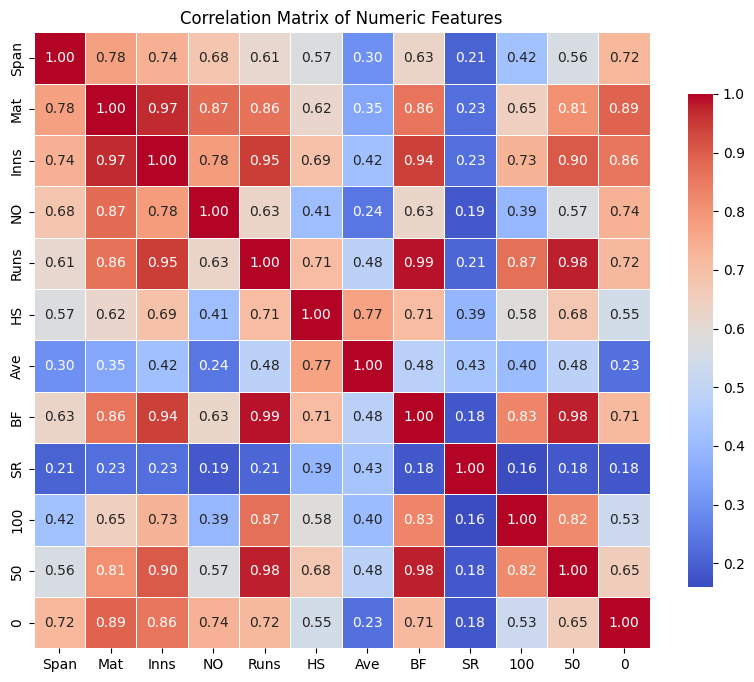

In [24]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Numeric Features')

plt.show()

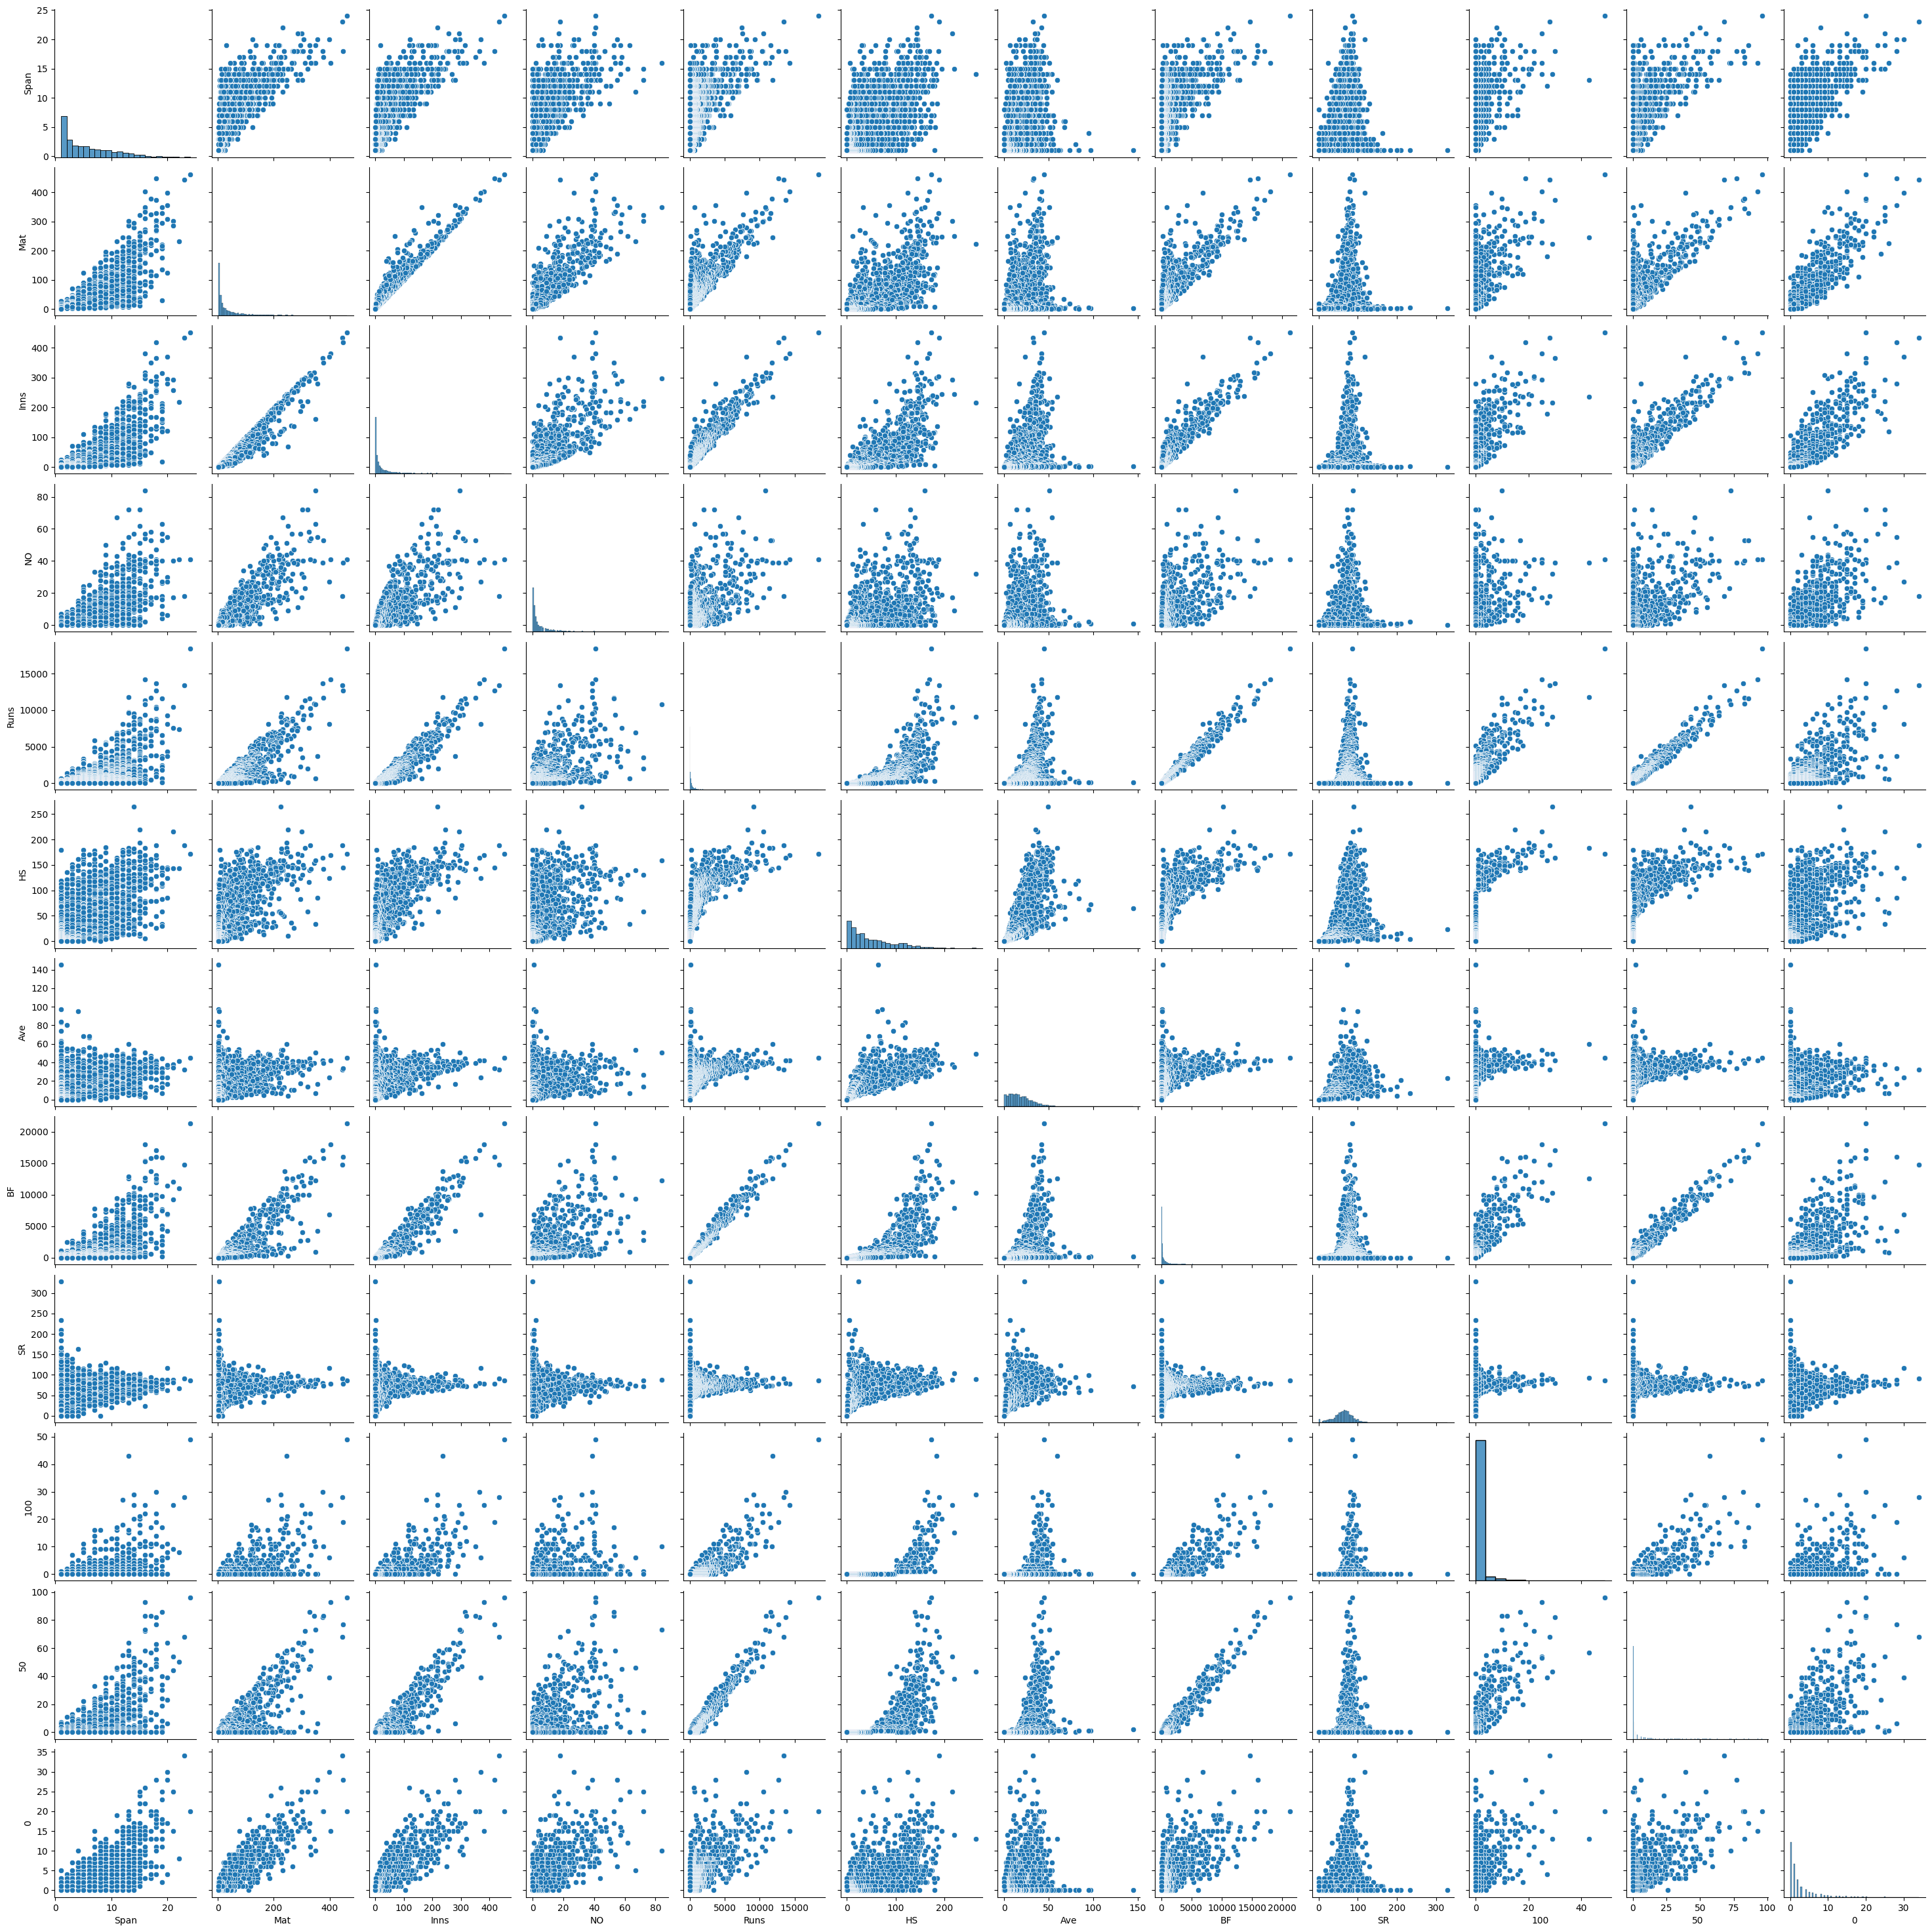

In [25]:
 #for more variance we can check:
sns.pairplot(df)

In [26]:
# Query2: checking who has scored the greatest number of centuries and greatest number of fifties
most_centuries= df.loc[df['100'].idxmax(), 'Player']
print(most_centuries)
most_fifties=df.loc[df['50'].idxmax(), 'Player']
print(most_fifties)


SR Tendulkar (INDIA)
SR Tendulkar (INDIA)


In [27]:
#Query number 3 Finding the top 10 century scorers and top 10 fifties scorers along with their matches played and their centuries and fifties ratio
top_10_century_scorers = df.nlargest(10, '100')

top_10_century_scorers['Century_Ratio'] = top_10_century_scorers['100'] / top_10_century_scorers['Mat']

top_10_fifty_scorers = df.nlargest(10, '50')

top_10_fifty_scorers['Fifty_Ratio'] = top_10_fifty_scorers['50'] / top_10_fifty_scorers['Mat']

print("Top 10 Century Scorers:")
print(top_10_century_scorers[['Player', 'Mat', 'Century_Ratio']])

print("\nTop 10 Fifty Scorers:")
print(top_10_fifty_scorers[['Player', 'Mat', 'Fifty_Ratio']])

Top 10 Century Scorers:
                         Player    Mat  Century_Ratio
0          SR Tendulkar (INDIA)  463.0       0.105832
5               V Kohli (INDIA)  245.0       0.175510
2          RT Ponting (AUS/ICC)  375.0       0.080000
19            RG Sharma (INDIA)  224.0       0.129464
3       ST Jayasuriya (Asia/SL)  445.0       0.062921
28                 HM Amla (SA)  181.0       0.149171
1   KC Sangakkara (Asia/ICC/SL)  404.0       0.061881
11            CH Gayle (ICC/WI)  301.0       0.083056
16      AB de Villiers (Afr/SA)  228.0       0.109649
8       SC Ganguly (Asia/INDIA)  311.0       0.070740

Top 10 Fifty Scorers:
                         Player    Mat  Fifty_Ratio
0          SR Tendulkar (INDIA)  463.0     0.207343
1   KC Sangakkara (Asia/ICC/SL)  404.0     0.230198
7        JH Kallis (Afr/ICC/SA)  328.0     0.262195
6     Inzamam-ul-Haq (Asia/PAK)  378.0     0.219577
9     R Dravid (Asia/ICC/INDIA)  344.0     0.241279
2          RT Ponting (AUS/ICC)  375.0     0.21

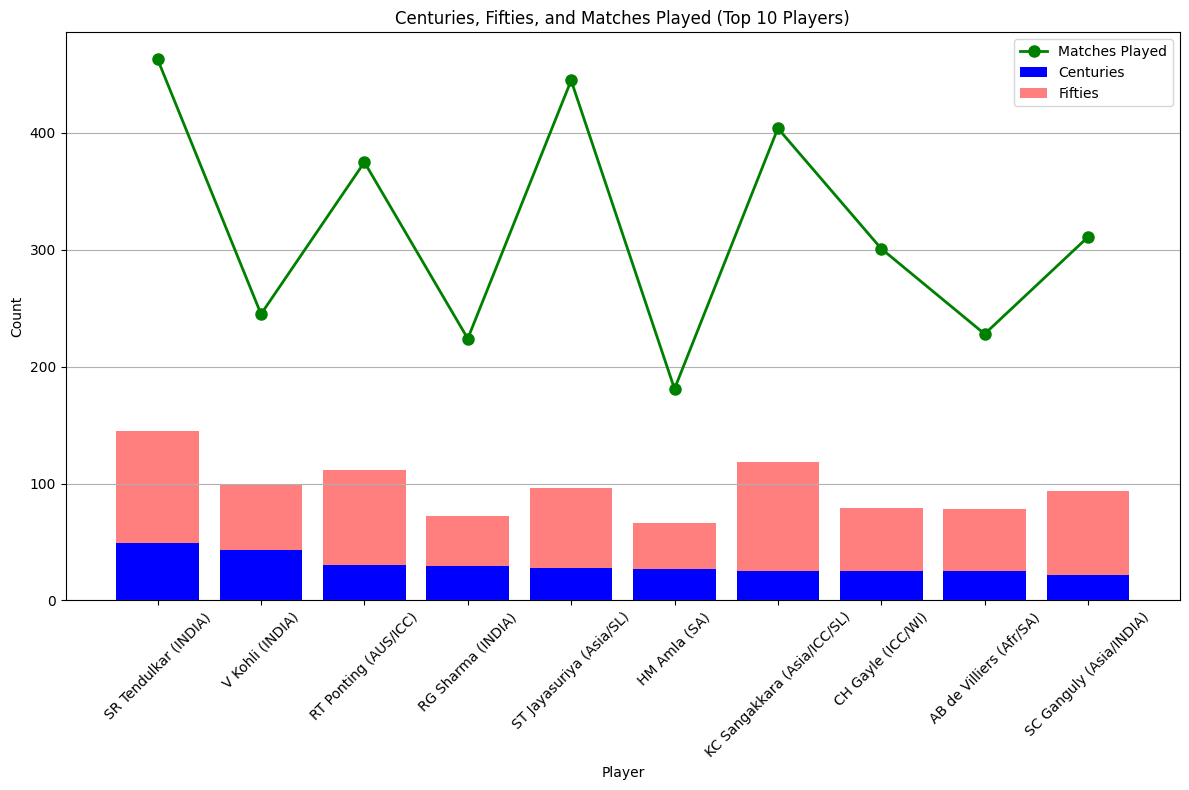

In [28]:
top_10_players = df.nlargest(10, '100')
"""
visualization for the above query 
"""
plt.figure(figsize=(12, 8))

plt.bar(top_10_players['Player'], top_10_players['100'], color='b', label='Centuries')

plt.bar(top_10_players['Player'], top_10_players['50'], bottom=top_10_players['100'], color='r', label='Fifties', alpha=0.5)

plt.plot(top_10_players['Player'], top_10_players['Mat'], color='g', marker='o', linewidth=2, markersize=8, label='Matches Played')

plt.title('Centuries, Fifties, and Matches Played (Top 10 Players)')
plt.xlabel('Player')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)  
plt.tight_layout()  

# Show plot
plt.show()

In [29]:
# Query number 4 finding longest career span 
max_span=df.loc[df['Span'].idxmax(), 'Player']
most_years=df['Span'].max()

print('Max span: ', max_span,': ',most_years)

Max span:  SR Tendulkar (INDIA) :  24


In [30]:
# Query 5 finding highest score in the data set
highest_score_player = df.nlargest(1, 'HS')
print(highest_score_player[['Player', 'HS']])

               Player     HS
19  RG Sharma (INDIA)  264.0


In [31]:
#Query6 Finding the player with the highest number of ducks
most_ducks_player = df.nlargest(1, '0')
print(most_ducks_player[['Player', '0']])

                    Player     0
3  ST Jayasuriya (Asia/SL)  34.0


In [32]:
#Query7 Filtering players with over 5000 runs, then identifying the player with the lowest and highest batting averages among them. Also, calculating the mean batting average for this subset of players.
filtered_df = df[df['Runs'] > 5000]  
lowest_average_player = filtered_df.nsmallest(1, 'Ave')
print(lowest_average_player[['Player', 'Ave']])
mean_ave=filtered_df['Ave'].mean()
print('Mean Ave:',mean_ave)
highest_average_player = filtered_df.nlargest(1, 'Ave')
print(highest_average_player[['Player', 'Ave']])

                          Player    Ave
30  Shahid Afridi (Asia/ICC/PAK)  23.57
Mean Ave: 39.06966292134831
            Player    Ave
5  V Kohli (INDIA)  59.85


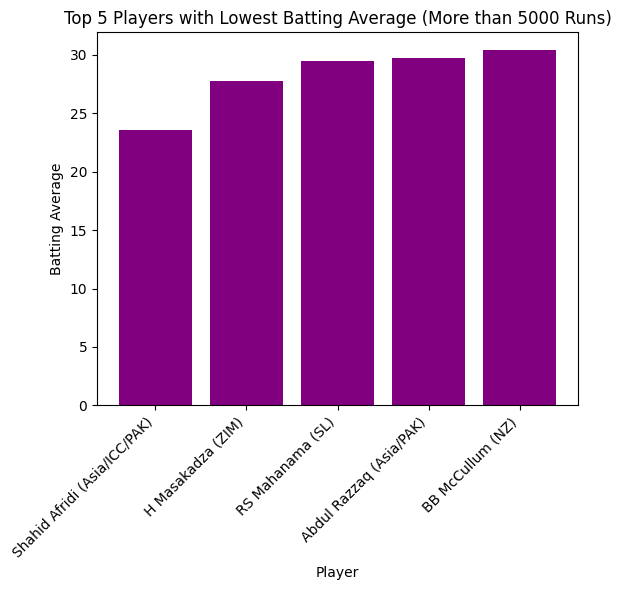

In [33]:
lowest_average_players = filtered_df.nsmallest(5, 'Ave')

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(lowest_average_players['Player'], lowest_average_players['Ave'], color='Purple')
plt.title('Top 5 Players with Lowest Batting Average (More than 5000 Runs)')
plt.xlabel('Player')
plt.ylabel('Batting Average')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
#Query 8 Filtering players with over 100 matches played, then identifying the player with the highest not-out percentage (the proportion of innings not resulting in a dismissal) and the player with the most not outs.
df_filtered = df[df['Mat'] > 100]  #
df_filtered['Not_Out_Percentage'] = df_filtered['NO'] / df_filtered['Inns']  
highest_not_out_percentage_player = df_filtered.nlargest(1, 'Not_Out_Percentage')
print(highest_not_out_percentage_player[['Player', 'Not_Out_Percentage']])
most_not_outs_player = df_filtered.nlargest(1, 'NO')
print(most_not_outs_player[['Player', 'NO']])


                 Player  Not_Out_Percentage
1183  EJ Chatfield (NZ)            0.770833
                   Player    NO
10  MS Dhoni (Asia/INDIA)  84.0


C:\Users\sehar\AppData\Local\Temp\ipykernel_15424\3600192129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Not_Out_Percentage'] = df_filtered['NO'] / df_filtered['Inns']


In [35]:
# Query9 Finding the player with the highest and lowest batting averages among those with over 100 matches played. Also, calculating the average batting average for this subset of players.
highest_average_player = df_filtered.nlargest(1, 'Ave')
print("Player with the highest batting average among those with over 100 matches:")
print(highest_average_player[['Player', 'Ave']])

lowest_average_player = df_filtered.nsmallest(1, 'Ave')
print("\nPlayer with the lowest batting average among those with over 100 matches:")
print(lowest_average_player[['Player', 'Ave']])
average_batting_average = df_filtered['Ave'].mean()
print("Average batting average among players with over 100 matches:", average_batting_average)

Player with the highest batting average among those with over 100 matches:
            Player    Ave
5  V Kohli (INDIA)  59.85

Player with the lowest batting average among those with over 100 matches:
                    Player   Ave
1198  GD McGrath (AUS/ICC)  3.83
Average batting average among players with over 100 matches: 28.592615384615385


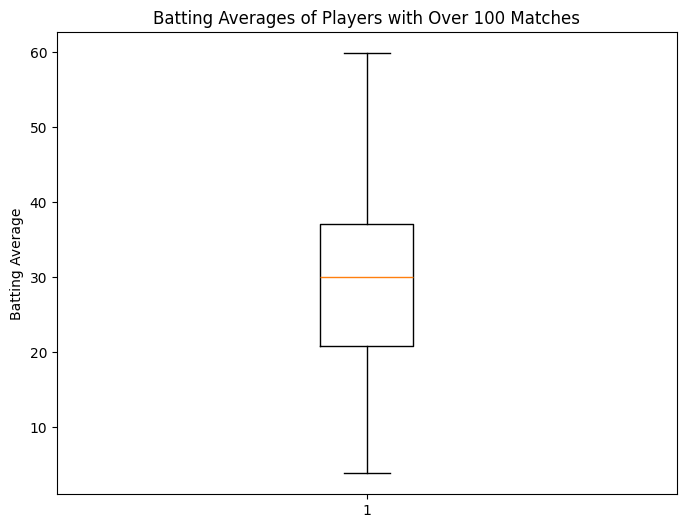

In [36]:

#visualization 
plt.figure(figsize=(8, 6))
plt.boxplot(df_filtered['Ave'])
plt.title('Batting Averages of Players with Over 100 Matches')
plt.ylabel('Batting Average')
plt.show()


In [37]:
# Query10 Identifying the player with the highest and lowest strike rates among those with over 100 matches played. Also, calculating the average strike rate for this subset of players.
highest_SR = df_filtered.nlargest(1, 'Ave')
print("Player with the highest Strike Rate among those with over 100 matches:")
print(highest_SR[['Player', 'SR']])

lowest_SR = df_filtered.nsmallest(1, 'Ave')
print("\nPlayer with the lowest Strike Rate among those with over 100 matches:")
print(lowest_SR [['Player', 'SR']])
average_SR= df_filtered['SR'].mean()
print("Average Strike rate among players with over 100 matches:",average_SR)

Player with the highest Strike Rate among those with over 100 matches:
            Player     SR
5  V Kohli (INDIA)  93.39

Player with the lowest Strike Rate among those with over 100 matches:
                    Player     SR
1198  GD McGrath (AUS/ICC)  48.72
Average Strike rate among players with over 100 matches: 76.25023076923077


In [38]:
#Query11 Counting the number of players from each country and identifying the country with the most batsmen.
country_counts = df['Player'].str.extract(r'\((.*?)\)')[0].value_counts()

# Displaying the country with the most batsmen
most_batsmen_country = country_counts.idxmax()
number_of_batsmen = country_counts.max()

print(f"The country with the most batsmen is {most_batsmen_country} with {number_of_batsmen} batsmen.")

The country with the most batsmen is ENG with 238 batsmen.


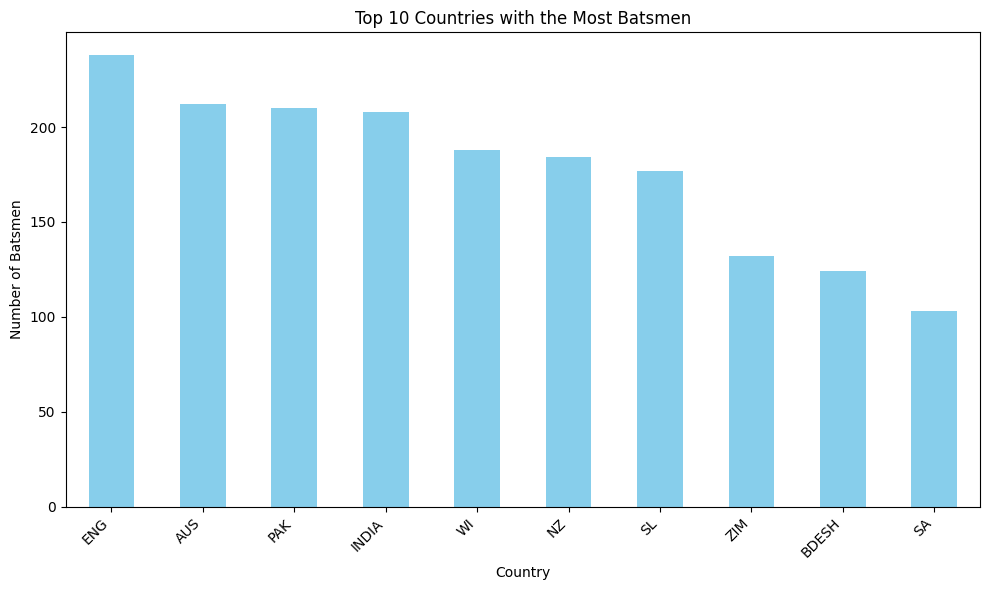

In [39]:
top_countries = country_counts.head(10)

# Plotting the top 10 countries
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Most Batsmen')
plt.xlabel('Country')
plt.ylabel('Number of Batsmen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [40]:
#Query 12 Analyzing the performance of the top 10 countries with the most batsmen by calculating aggregate statistics such as mean batting average, total runs scored, total centuries, and total fifties.
top_countries = country_counts.head(10).index

# Filtering the dataset for the top 10 countries
top_countries_df = df[df['Player'].str.extract(r'\((.*?)\)')[0].isin(top_countries)]

# Grouping the filtered dataset by nationality and calculating aggregate statistics
nationality_stats_top10 = top_countries_df.groupby(top_countries_df['Player'].str.extract(r'\((.*?)\)')[0]).agg({
    'Ave': 'mean',            # Mean batting average
    'Runs': 'sum',            # Total runs scored
    '100': 'sum',             # Total centuries
    '50': 'sum'               # Total fifties
})

# Renaming columns for clarity
nationality_stats_top10.columns = ['Mean Batting Average', 'Total Runs', 'Total Centuries', 'Total Fifties']

# Sorting countries based on mean batting average 
nationality_stats_top10 = nationality_stats_top10.sort_values(by='Mean Batting Average', ascending=False)



In [41]:
print(nationality_stats_top10)


       Mean Batting Average  Total Runs  Total Centuries  Total Fifties
0                                                                      
AUS               20.095031    168769.0            173.0          969.0
SA                19.927330     84794.0            120.0          431.0
ENG               19.394853    135847.0            153.0          692.0
PAK               19.269102    154044.0            169.0          803.0
NZ                18.167774    133023.0            119.0          678.0
WI                18.164894    136787.0            138.0          699.0
INDIA             17.277812    152458.0            220.0          800.0
SL                16.376441    117861.0             89.0          628.0
ZIM               15.483485     84823.0             58.0          436.0
BDESH             14.763468     62507.0             50.0          335.0


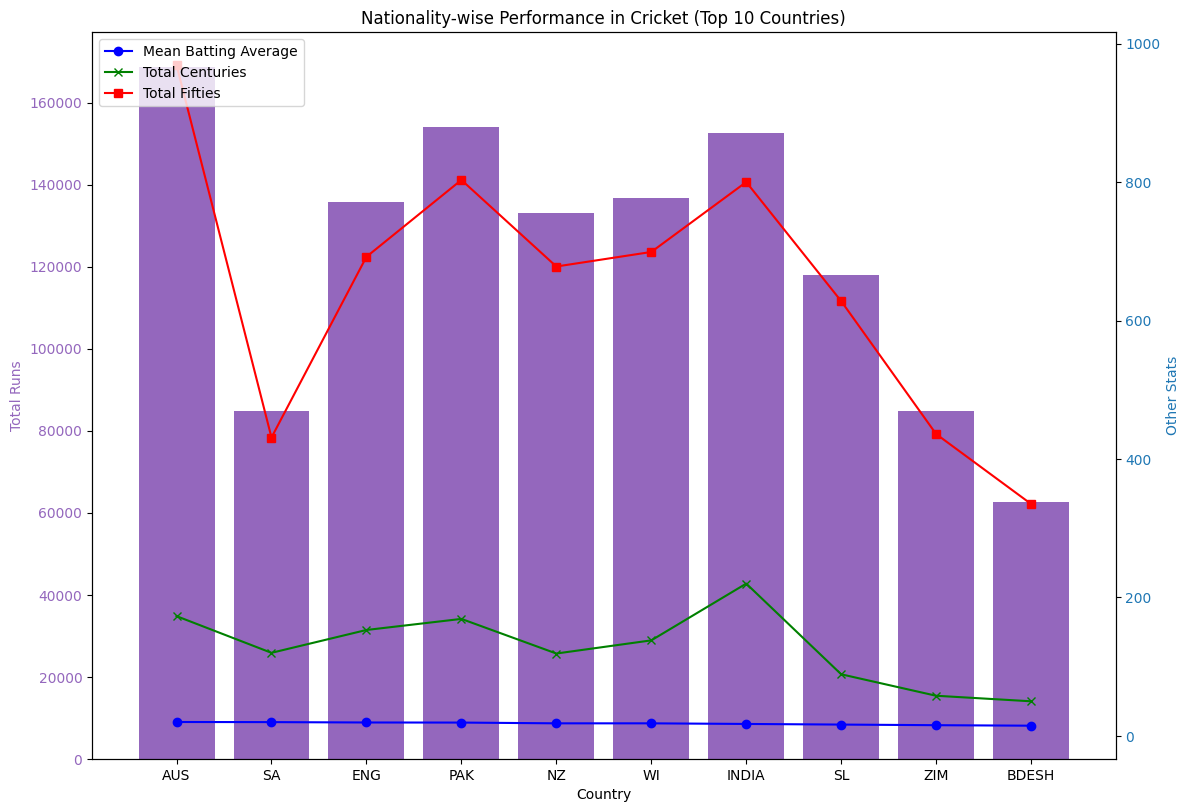

In [42]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for 'Total Runs' on the first axis
color = 'tab:purple'
ax1.set_xlabel('Country')
ax1.set_ylabel('Total Runs', color=color)
ax1.bar(nationality_stats_top10.index, nationality_stats_top10['Total Runs'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Other Stats', color=color)  # we already handled the x-label with ax1
ax2.plot(nationality_stats_top10.index, nationality_stats_top10['Mean Batting Average'], color='b', marker='o', label='Mean Batting Average')
ax2.plot(nationality_stats_top10.index, nationality_stats_top10['Total Centuries'], color='g', marker='x', label='Total Centuries')
ax2.plot(nationality_stats_top10.index, nationality_stats_top10['Total Fifties'], color='r', marker='s', label='Total Fifties')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Nationality-wise Performance in Cricket (Top 10 Countries)')
ax2.legend(loc='upper left')
plt.show()

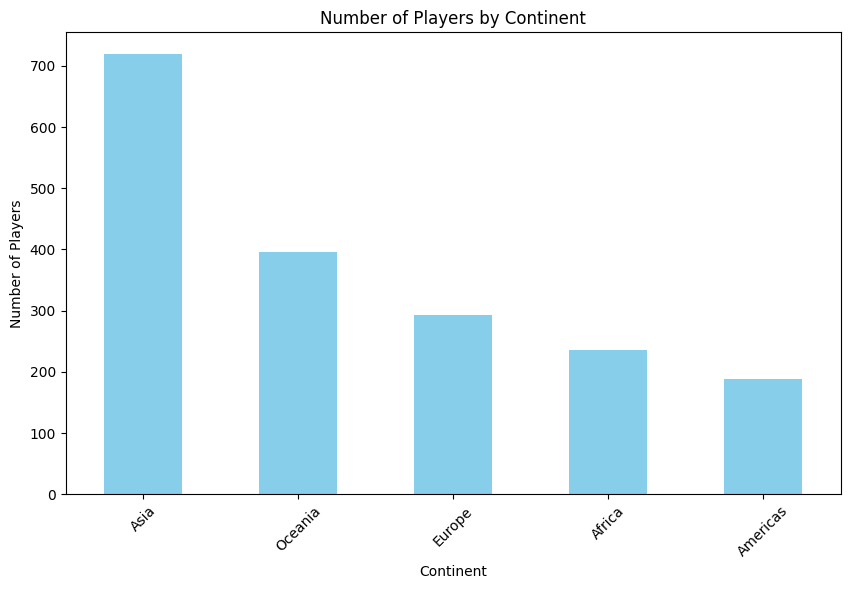

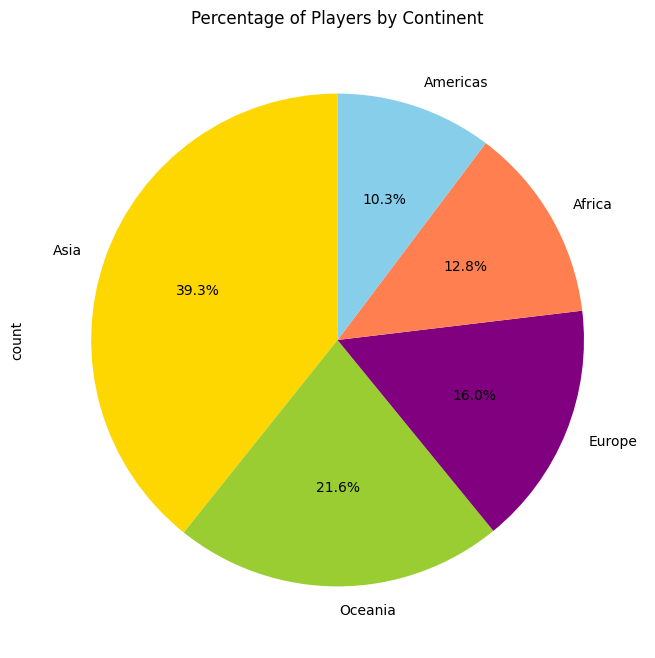

In [43]:
#Query 13 Mapping players' nationalities to continents and visualizing the number of players from each continent.
continent_map = {
    'INDIA': 'Asia',
    'SL': 'Asia',
    'AUS': 'Oceania',
    'SA': 'Africa',
    'ENG': 'Europe',
    'IRE': 'Europe',
    'NZ': 'Oceania',
    'PAK': 'Asia',
    'WI': 'Americas',  
    'BAN': 'Asia',
    'ZIM': 'Africa',
    'BDESH': 'Asia'
}

# Extract and map nationality to continent inline during aggregation
continent_counts = df['Player'].str.extract(r'\((.*?)\)')[0].map(continent_map).value_counts()

plt.figure(figsize=(10, 6))
continent_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Players by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 8))
continent_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'yellowgreen','purple', 'coral', 'skyblue'])
plt.title('Percentage of Players by Continent')
plt.show()

In [44]:
print(continent_counts)

0
Asia        719
Oceania     396
Europe      293
Africa      235
Americas    188
Name: count, dtype: int64


In [45]:
#query14 Identifying the player with the most consistent performance in terms of batting average (lowest standard deviation).
batting_averages = df['Ave']

std_dev = batting_averages.std()

most_consistent_player = df.loc[batting_averages.sub(batting_averages.mean()).abs().argsort().iloc[0]]

print("Player with the most consistent performance (lowest standard deviation):")
print(most_consistent_player)

Player with the most consistent performance (lowest standard deviation):
Player    B Lee (AUS)
Span               13
Mat             221.0
Inns            110.0
NO               44.0
Runs           1176.0
HS               59.0
Ave             17.81
BF             1407.0
SR              83.58
100               0.0
50                3.0
0                16.0
Name: 349, dtype: object


In [46]:
#Query 15 Calculating the correlation coefficients between the frequency of ducks
df['Duck_Frequency'] = df['0'] / df['Inns']
corr_ave = df['Duck_Frequency'].corr(df['Ave'])
corr_sr = df['Duck_Frequency'].corr(df['SR'])

print("Correlation coefficient between Duck Frequency and Batting Average:", corr_ave)
print("Correlation coefficient between Duck Frequency and Strike Rate:", corr_sr)

Correlation coefficient between Duck Frequency and Batting Average: -0.3227828869220654
Correlation coefficient between Duck Frequency and Strike Rate: -0.32509376504156706


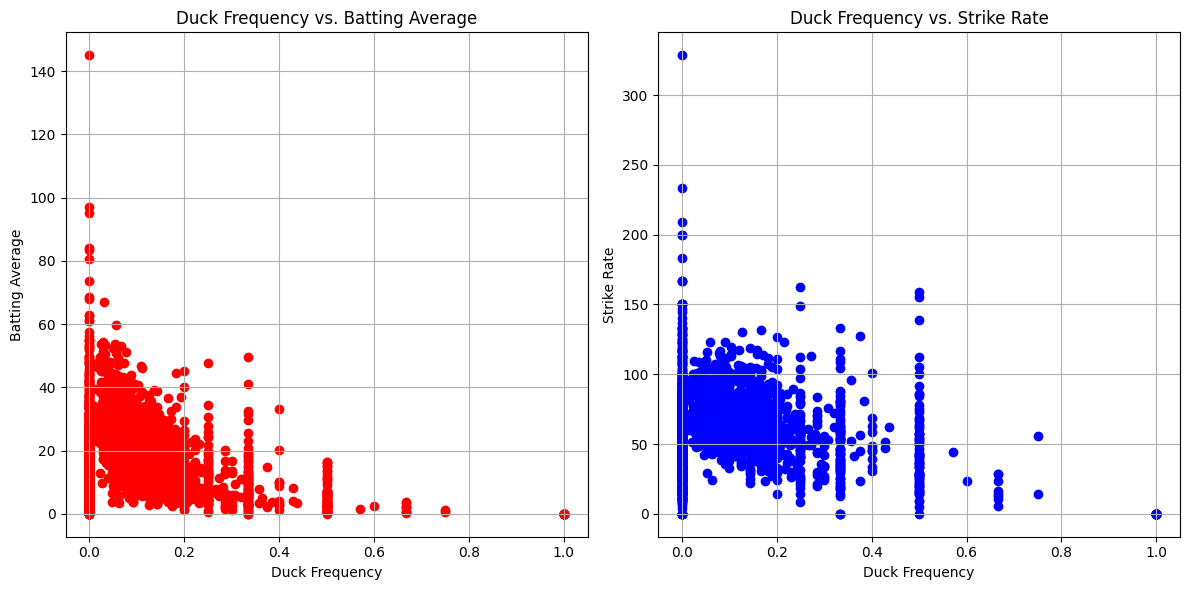

In [47]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Duck_Frequency'], df['Ave'], color='red')
plt.title('Duck Frequency vs. Batting Average')
plt.xlabel('Duck Frequency')
plt.ylabel('Batting Average')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df['Duck_Frequency'], df['SR'], color='blue')
plt.title('Duck Frequency vs. Strike Rate')
plt.xlabel('Duck Frequency')
plt.ylabel('Strike Rate')
plt.grid(True)

plt.tight_layout()
plt.show()

The best opener: V Kohli (INDIA)
The best middle order player: MG Bevan (AUS)
The best top order player: A Symonds (AUS)
The best finisher: CG Greenidge (WI)
The best lower middle order player: Najibullah Zadran (AFG)


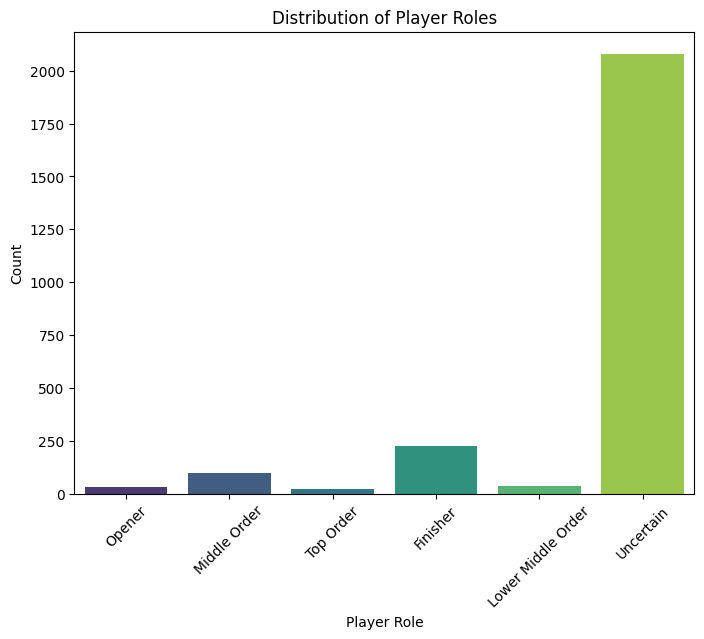

In [52]:
# Query 16 Determining the best players in different batting roles, we will  create custom conditions on this to part the data 
df['Player_Role'] = df.apply(player_role, axis=1)

def player_role(row):
    if row['Inns'] < 50:
        return 'Uncertain'  # Not enough innings to determine a fixed role
    elif row['Ave'] >= 40 and row['SR'] >= 80:
        return 'Opener'
    elif row['Ave'] >= 35 and row['SR'] >= 80:
        return 'Top Order'
    elif row['Ave'] >= 30 and row['SR'] >= 70:
        return 'Middle Order'
    elif row['Ave'] >= 25 and row['SR'] >= 70:
        return 'Lower Middle Order'
    else:
        return 'Finisher'

best_openers = df[(df['Player_Role'] == 'Opener')]
best_opener = best_openers.loc[best_openers['Ave'].idxmax(), 'Player']
print("The best opener:", best_opener)

middle = df[(df['Player_Role'] == 'Middle Order')]
best_middle = middle.loc[middle['Ave'].idxmax(), 'Player']
print("The best middle order player:", best_middle)

tops = df[(df['Player_Role'] == 'Top Order')]
best_top = tops.loc[tops['Ave'].idxmax(), 'Player']
print("The best top order player:", best_top)

finish = df[df['Player_Role'] == 'Finisher']
best_finisher = finish.loc[finish['Ave'].idxmax(), 'Player']
print("The best finisher:", best_finisher)

lowermiddle = df[(df['Player_Role'] == 'Lower Middle Order')]
best_lowmid = lowermiddle.loc[lowermiddle['Ave'].idxmax(), 'Player']
print("The best lower middle order player:", best_lowmid)


plt.figure(figsize=(8, 6))
sns.countplot(x='Player_Role', hue='Player_Role', data=df, palette='viridis', legend=False)
plt.title('Distribution of Player Roles')
plt.xlabel('Player Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

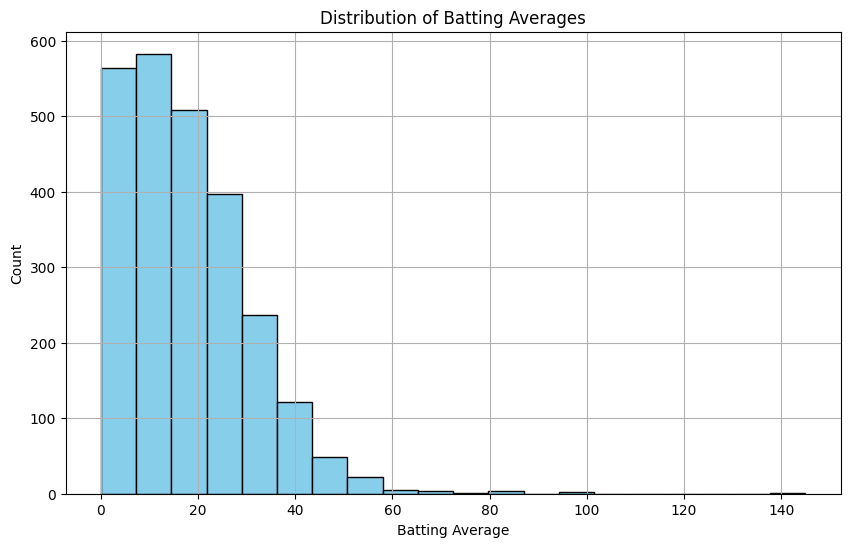

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(df['Ave'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Batting Averages')
plt.xlabel('Batting Average')
plt.ylabel('Count')
plt.grid(True)
plt.show()

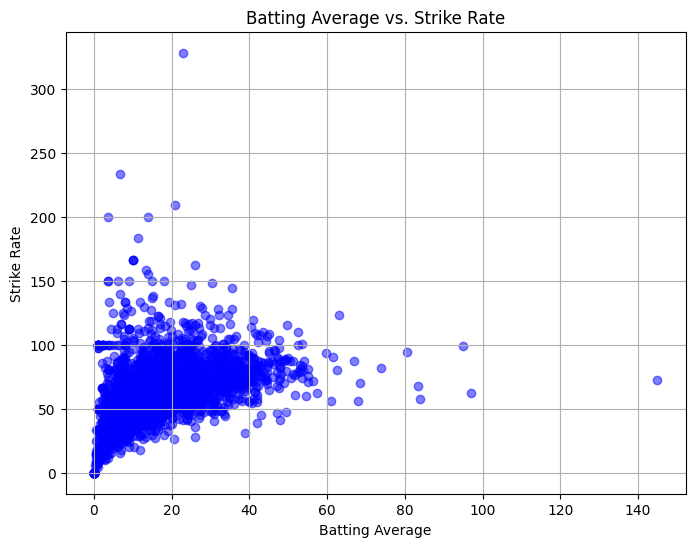

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Ave'], df['SR'], color='blue', alpha=0.5)

plt.title('Batting Average vs. Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

plt.grid(True)
plt.show()

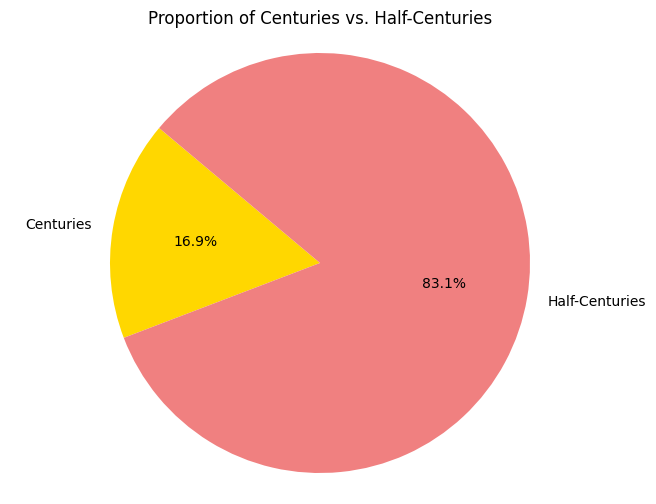

In [57]:
centuries_count = df['100'].sum()
half_centuries_count = df['50'].sum()
labels = ['Centuries', 'Half-Centuries']
sizes = [centuries_count, half_centuries_count]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral'])
plt.title('Proportion of Centuries vs. Half-Centuries')
plt.axis('equal')
plt.show()

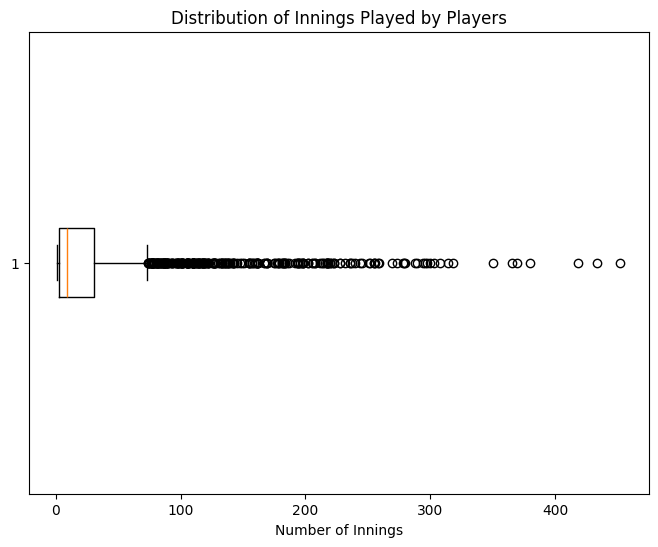

In [58]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Inns'], vert=False)
plt.title('Distribution of Innings Played by Players')
plt.xlabel('Number of Innings')
plt.show()

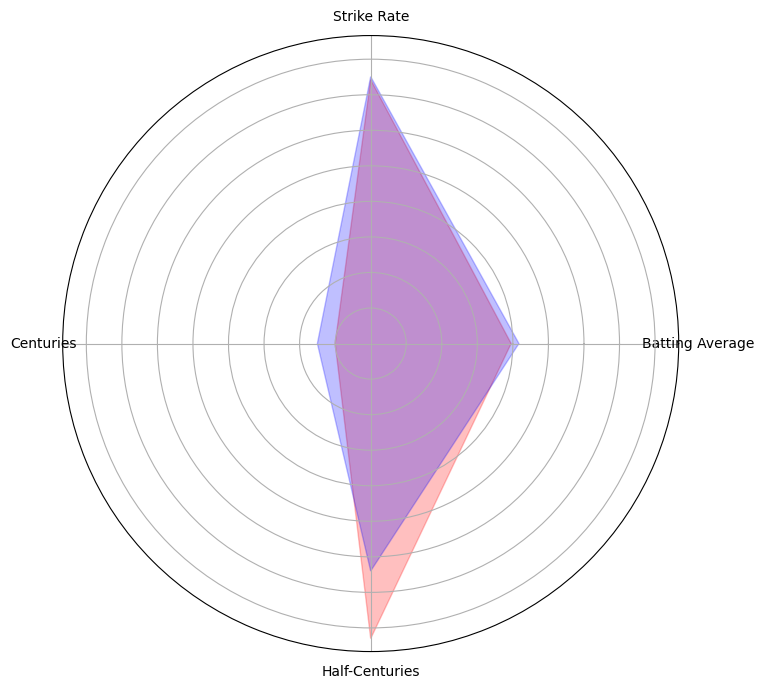

In [60]:
# radar chart to compare the batting metrics of player 7 (red) and player 15 (blue) 
player1_values = df.loc[6, ['Ave', 'SR', '100', '50']].tolist()  
player2_values = df.loc[14, ['Ave', 'SR', '100', '50']].tolist()  
categories = ['Batting Average', 'Strike Rate', 'Centuries', 'Half-Centuries']
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
player1_values += player1_values[:1]
player2_values += player2_values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, player1_values, color='red', alpha=0.25)
ax.fill(angles, player2_values, color='blue', alpha=0.25)


ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.show()

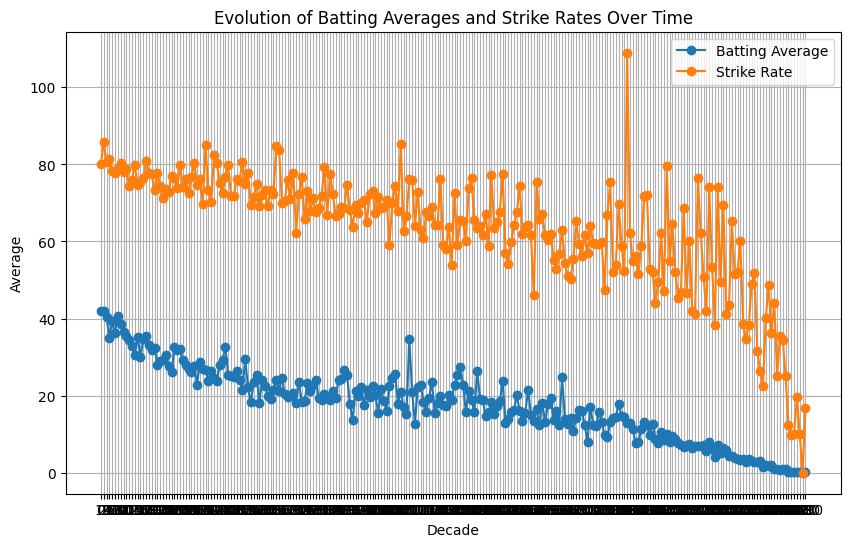

In [63]:
df['Decade'] = (df.index // 10) * 10
avg_stats_per_decade = df.groupby('Decade').agg({'Ave': 'mean', 'SR': 'mean'}).reset_index()


plt.figure(figsize=(10, 6))
plt.plot(avg_stats_per_decade['Decade'], avg_stats_per_decade['Ave'], marker='o', label='Batting Average')
plt.plot(avg_stats_per_decade['Decade'], avg_stats_per_decade['SR'], marker='o', label='Strike Rate')
plt.title('Evolution of Batting Averages and Strike Rates Over Time')
plt.xlabel('Decade')
plt.ylabel('Average')
plt.xticks(avg_stats_per_decade['Decade'])
plt.legend()
plt.grid(True)
plt.show()
